# The Iris Dataset in scikit-learn 

In [2]:
!pip install -U scikit-learn

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.style.use('ggplot')

In [5]:
iris = datasets.load_iris()

In [6]:
type(iris)

sklearn.utils.Bunch

In [7]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
iris.data.shape

(150, 4)

### Samples are in rows, features are in columns 
### Target variables: 0 = setosa, 1 =  versicolor, 2 = virginica
### EDA

In [9]:
X = iris.data
y = iris.target

df=pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


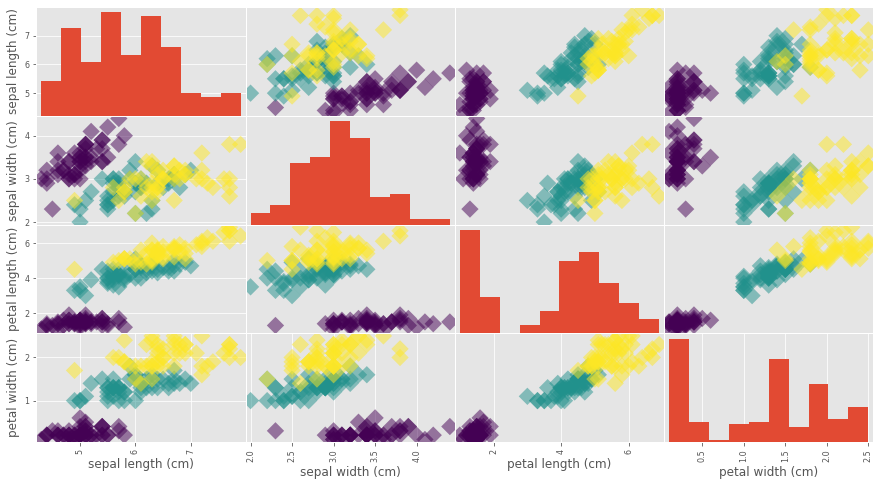

In [10]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[15, 8], s=150, marker='D')

# Training data: label data
# k-nearest neighbors (knn)
* Basic Idea: predict the label of a data point by:
    * Looking at the "k" closest labeled data points
    * Taking a majority vote
# Scikit-learn fit and predict
* All machine learning models implemented as Python classes
    * These models implement algorithms for learning and predicting
    * as well as storing the information learned from the data
* Training a model on the data is "fitting" a model to the data
    * .fit() method
* To predict the labels of new data: .predict() method


# Example:  

In [11]:
#import
from sklearn.neighbors import KNeighborsClassifier

#instantiate classifier, specify number of neighbors, assign to knn
knn = KNeighborsClassifier(n_neighbors=6)

#fit this classifier to our training set (labeled data)
#syntax .fit(features, labels)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

### We now want to use our classifier to label unlabeled data
### we use X_new as our unlabeled data
### The scikit-learn api requires that our unlabeled data be: features=columns, observations=rows
### We use the .predict() method on our classifier and pass it the array of unlabeled data: X_new

In [12]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_new)
prediction

array([1, 1, 0])

### array([1, 1, 0]) This is what the model predicts. We fed it some data, and it predicts that based on the data, the "observations" are [setosa, setosa, versicolor] 

<hr>

# Measuring Model Performance
* Accuracy is a commonly used metric
* Accuracy = Fraction of Correct Predictions
* What data do we use to compute accuracy?
* IF we use the data we used to train the model, this will NOT be indicative of its ability to generalize, i.e., to apply itself to NEW data.
* We thus split our data into 2 sets: training set and test set
* Fit/train the model on training set
* make predictions on test set
* compare predictions with known labels

# Train/test split 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

## What's going on here?
* X := feature data
* y := targets (labels)
* test_size := what proportion of the original data is used for the test set
* random_state := sets seed for the random number generator, for reproducibility. This is what splits the data
* this function returns 4 arrays:
    * X_train := training data
    * X_test := test data
    * y_train := training labels
    * y_test := test labels
* By default, the function splits the data in 75% training data and 25% test data
    * in the code above we changed the test size to 30%
* It is good practice to perform the split so that your split reflects the labels of your data, i.e. you want the labels to be distributed in the train/test sets as they are in the original data set.
    * to achieve this, we specify with <em>stratify</em> = y
    
* We can now instantiate our knn classifier, fit it to the data, make predictions and store

In [14]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:", y_pred)

Test set predictions: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


## Test for accuracy:

In [15]:
knn.score(X_test, y_test)

0.9555555555555556

# Model Complexity:
* Decision boundaries
    * As K-increases, the decision boundary gets smoother and less curvy
        * less complex
        * this can cause the model to perform less well on the training and test sets
    * As k decreases, the decision boundary is more jagged
        * more complex
* Beware of overfitting and underfitting
    * There is a sweet spot for choosing k-nearest neighbors values

<hr>

# Exercise:
### The digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

In [16]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [17]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


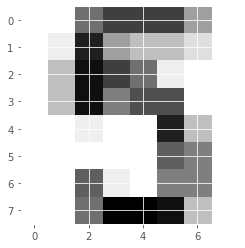

In [18]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### It looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? You'll do so in the next exercise!

# Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [19]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))
 

0.9833333333333333


In [3]:
help(.score())

SyntaxError: invalid syntax (<ipython-input-3-5daa388c3618>, line 1)

# Overfitting and underfitting

Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

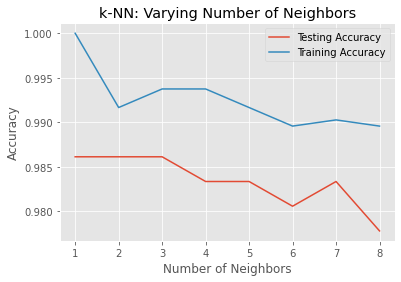

In [20]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


###  It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!

<hr> 

# Introduction to Regression 

### In regression tasks, a target value is a continuously varying variable, such as GDP, or house prices
### Boston Housing Data

In [21]:
boston = pd.read_csv('data/boston_housing.csv')
boston.head(1)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


* CRIM := crime rate per capita
* NX := nitrous oxide concentration
* RM := average number of rooms per dwelling
* MEDV := (target value) median value of occupied homes x$1000
# Creating feature and target arrays
* we need to do this because scikit-learn requires arrays of features and arrays of target values

In [22]:
X = boston.drop('MEDV', axis=1).values  #make numpy array of features
y= boston['MEDV'].values   #numpy array of target values

# Predicting house value from a single feature: avg number of rooms on a block
* number of rooms, RM is the fifth column
* using index slicing we can get this array

In [23]:
X_rooms = X[:, 5]  # X[ALL ROWS, 5th COLUMN]
X_rooms.shape

(506,)

In [24]:
y.shape

(506,)

In [25]:
#(-1, 1) implies to numpy that we have an unknown value of columns, even though we know it should be 1.
# thus we pass -1
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

In [26]:
y.shape

(506, 1)

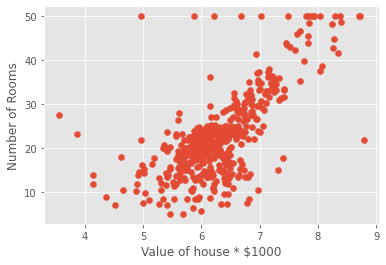

In [27]:
plt.scatter(X_rooms,y)
plt.xlabel('Value of house * $1000')
plt.ylabel('Number of Rooms')
plt.show()

## Fitting a Regression Model 

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
# instantiate the regresson
reg = LinearRegression()

In [30]:
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

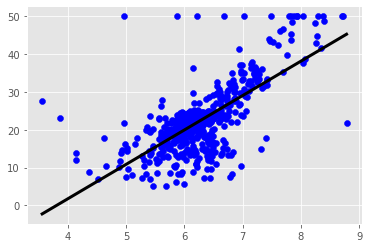

In [31]:
plt.scatter(X_rooms, y, color='blue')  #plot the points again, (number of rooms vs price of home)
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)  #plot the regression line
plt.show()

<hr> 

# Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the <font color='red'>country's GDP, fertility rate, and population.</font> As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is <b>quantitative, this is a regression problem.</b> To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice. 

In [32]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gapminder.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df.fertility.values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


### Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

# Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

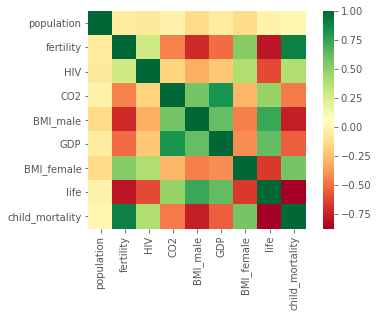

In [33]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [34]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


# The basics of Linear Regression 
* how does linear regression actually work?
* we want to fit a line to the data
    * $ y = ax+b$
    * y:= target
    * x := single feature
    * a, b := parameters of the model
* With this, we reduce the problem to: 
    * <em>How do we choose a and b?</em>
* A common method is to define an error function for any given line
    * Then, choose the line that minimizes the error function
    * known as a "loss" or "cost" function
* Ideally we want the line to be as close to all the points as possible
    * thus the use of the sum of least squares is used to calculate the distance of each point to the line
    * the distance is called the residual
    * OLS
* When we call .fit() in scikit-learn, the function performs OLS under the hood
* When there is 2 features and 1 target: 
    * $ y\ =\ a_1x_1+a_2x_2+b $
    * To fit a linear regression model here:
        * Need to specify 3 variables
* No matter the number variables, scikit-learn takes care of the math for you

# Linear Regression on Boston Housing Dataset 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
X = X.reshape(-1, 1)
X.shape

(139, 1)

In [37]:
y = y.reshape(-1, 1)
y.shape

(139, 1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
reg_all = LinearRegression() # instantiate regresson

In [40]:
reg_all.fit(X_train, y_train) # fit on the training data
y_pred = reg_all.predict(X_test)

In [41]:
reg_all.score(X_test, y_test)

0.7298987360907498

### You'll rarely use LinearRegression() like this, out of the box. 
* Instead you will you regularization, which adds constraints
* However, this is a good starting point to learn how to use regularized linear models

# Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the 
R
2
 score using scikit-learn's .score() method. 

0.6192442167740035


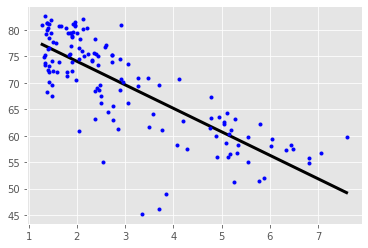

In [42]:
# Create arrays for features and target variable
y = df['life'].values
X_fertility = df.fertility.values
# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1, 1)

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.plot(X_fertility, y, marker='.', color='blue', linestyle='none')
plt.show()


In [43]:
prediction_space

array([[1.28      ],
       [1.40877551],
       [1.53755102],
       [1.66632653],
       [1.79510204],
       [1.92387755],
       [2.05265306],
       [2.18142857],
       [2.31020408],
       [2.43897959],
       [2.5677551 ],
       [2.69653061],
       [2.82530612],
       [2.95408163],
       [3.08285714],
       [3.21163265],
       [3.34040816],
       [3.46918367],
       [3.59795918],
       [3.72673469],
       [3.8555102 ],
       [3.98428571],
       [4.11306122],
       [4.24183673],
       [4.37061224],
       [4.49938776],
       [4.62816327],
       [4.75693878],
       [4.88571429],
       [5.0144898 ],
       [5.14326531],
       [5.27204082],
       [5.40081633],
       [5.52959184],
       [5.65836735],
       [5.78714286],
       [5.91591837],
       [6.04469388],
       [6.17346939],
       [6.3022449 ],
       [6.43102041],
       [6.55979592],
       [6.68857143],
       [6.81734694],
       [6.94612245],
       [7.07489796],
       [7.20367347],
       [7.332

# Train/test split for regression

As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the 
R
2
score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df. 

In [44]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gapminder.csv')


# Create arrays for features and target variable
y = df['life'].values
X = df.drop(['life', 'Region'], axis=1).values
# Reshape X and y
y = y.reshape(-1,1)
# X = X.reshape(-1, 1)

In [45]:
X.shape

(139, 8)

In [46]:
y.shape

(139, 1)

In [47]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.838046873143013
Root Mean Squared Error: 3.2476010800369504


### Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? 

# Cross Validation
* Pitfall
    * The r-squared is dependent on the way you split the data
    * The data points may have some peculiarities, which may affect the generalization of the model
    * We use cross validation to avoid this pitfall
* Cross-validation basics
    * Split the data into 5 groups, known as "folds"
    * hold out the first fold as a test set
    * train the model on 4 folds
    * test the model on the remaining fold
    * Repeat the process, but this time withhold the 2nd fold as the test set
    * Repeat this for all 5 folds
    * From this process results 5 values of $ R^2 $
        * from these 5 values we can compute sstatistics of interest, such as mean, median, confidence intervals, etc.
    * This process is called <font color='red'>5 fold cross validation</font>
        * more generally, <font color='red'><b>k-fold CV</b></font>
        * more folds means more computing power is needed

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#instantiate model (regressor in this case)
reg = LinearRegression()

# get array of results
# default result is r^2, the default of LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793406


# Regularized Regression
### Why regularize?
* Recall: 
    * Linear regression minimizes a loss function
    * chooses coefficint $ a_i$ for each feature variable $ x_i$
    * Large coefficients can lead to overfitting 
        * for this reason it is standard practice to alter the loss function so that it penalizes for large coefficients
    *  This is regularization
### Ridge Regression
* Our loss function is the standard OLS function +  the squared value of each coefficient multiplied by some constant alpha.
# $ \alpha\ \sum_{i\ =\ 1}^{n}a_i^2 $
    * Here, alpha <b>(sometimes known as lambda $ \lambda $ )</b> is a parameter we must choose
    * we should choose the alpha for which our model performs best
    * choosing alpha is similar to choosing k in knn
    * this is called hyper-parameter tuning
    * Notice: when alpha is zero, we only get back the OLS function
    * alpha controls model complexity
    * high alpha causes underfitting
    

In [49]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(ridge.score(X_test, y_test))
ridge_pred

0.8442469959975751


array([[70.34385494],
       [72.04410446],
       [75.09285228],
       [62.81890609],
       [78.06014781],
       [73.16632328],
       [58.89528641],
       [74.58886265],
       [59.64466856],
       [71.47776525],
       [75.60829989],
       [56.12202386],
       [61.80010909],
       [57.68747071],
       [51.08093281],
       [74.9587951 ],
       [79.29948651],
       [61.83599986],
       [74.94019467],
       [73.78167512],
       [72.55012135],
       [71.71604438],
       [57.14330711],
       [80.19528318],
       [85.01665584],
       [72.95956456],
       [78.42916886],
       [73.3607733 ],
       [49.31533381],
       [74.17120019],
       [73.864539  ],
       [75.9955175 ],
       [85.01748885],
       [76.95957703],
       [73.85815415],
       [60.76660656],
       [72.15851403],
       [79.56699468],
       [76.64004403],
       [70.56718238],
       [54.98493318],
       [61.1171939 ]])

# Lasso Regression
$ \alpha\ \sum_{i\ =\ 1}^{n}{{|a}_i|}$

In [50]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.8721296169613542

* Lasso regression can be used to select important features of a dataset
* Lasso shrinks the coefficients of less important features to exactly 0
* The ones that are not shrunk to zero are selected by the lasso algorithm


Using the Boston Housing data

In [51]:
names = boston.drop("MEDV", axis=1).columns
X = boston.drop('MEDV', axis=1).values  #make numpy array of features
y= boston['MEDV'].values   #numpy array of target values
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

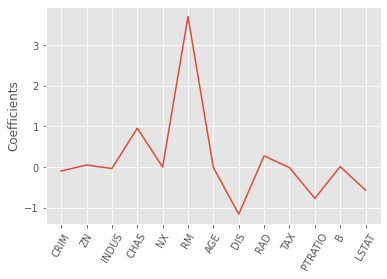

In [52]:
_=plt.plot(range(len(names)), lasso_coef)
_=plt.xticks(range(len(names)), names, rotation=60)
_=plt.ylabel('Coefficients')
plt.show()

# Regularization I: Lasso

In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y. 

In [53]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gapminder.csv')


# Create arrays for features and target variable
y = df['life'].values
X = df.drop(['life', 'Region'], axis=1).values
# Reshape X and y
y = y.reshape(-1,1)

df_columns = df.drop(['life', 'Region'], axis=1).columns

In [54]:
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


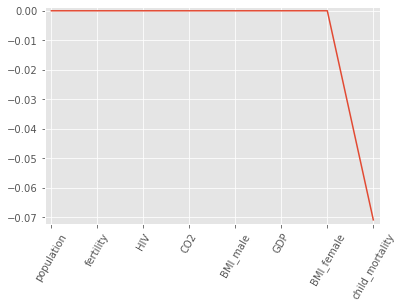

In [55]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


# <font color='red'> **************** Function ***************</font> 

In [56]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as 
L
1
regularization because the regularization term is the 
L
1
 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the 
L
2
 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated 
R
2
 scores for each, using this function that we have defined for you, which plots the 
R
2
 score as well as standard error for each alpha: 

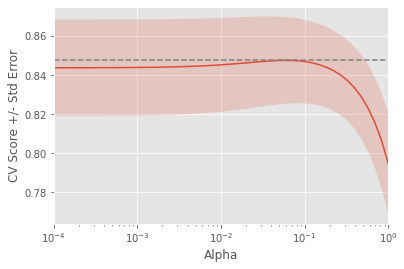

In [57]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


### Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? 

# Building a logistic regression model

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

In [75]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/diabetes.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
# Create arrays for features and target variable
y = df['diabetes'].values
X = df.drop(['diabetes'], axis=1).values
# Reshape X and y
# y = y.reshape(-1,1)



In [90]:
# y.reshape(1, -1)
X.shape, y.shape

((768, 8), (768,))

In [91]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


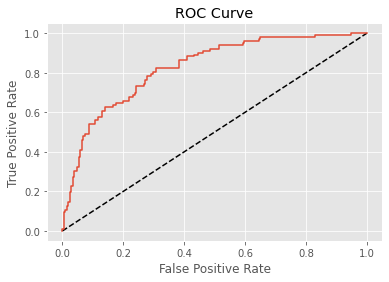

In [92]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# This ROC curve provides a nice visual way to assess your classifier's performance.

In [93]:
from sklearn.metrics import roc_auc_score
 
logreg = LogisticRegression()
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_prob)

ValueError: Found input variables with inconsistent numbers of samples: [460, 308]

In [94]:
X_train

array([[  0.   ,  94.   ,   0.   , ...,   0.   ,   0.256,  25.   ],
       [  8.   , 125.   ,  96.   , ...,   0.   ,   0.232,  54.   ],
       [  1.   , 111.   ,  86.   , ...,  30.1  ,   0.143,  23.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])